# Lab0: Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
fname = './data/km_year_power_price.csv'
data = pd.read_csv(fname)
print(data)

          km  year  powerPS  avgPrice
0     125000  2001       40   1371.11
1     150000  2001       40   1298.70
2       5000  2001       60   1232.43
3      50000  2001       60   1733.89
4      60000  2001       60   1985.24
...      ...   ...      ...       ...
1292    5000  2015      260  45277.18
1293   10000  2015      260  54156.28
1294   20000  2015      260  49492.38
1295   10000  2015      300  38542.69
1296   20000  2015      300  39683.32

[1297 rows x 4 columns]


In [3]:
price = data['avgPrice']
km = data['km']
year = data['year']
power = data['powerPS']

### Using scipy.stats.linregress

In [8]:
# prices from kilometers 
linreg_km = linregress(km,price)
price_km = linreg_km.slope*km + linreg_km.intercept

# prices from year
linreg_y = linregress(year,price)
price_year = linreg_y.slope*year + linreg_y.intercept

# prices from engine power
linreg_pw = linregress(power,price)
price_pw = linreg_pw.slope*power + linreg_pw.intercept

print('LINREGRESS')
print('from km: A =',linreg_km.slope,'B =',linreg_km.intercept)
print('from year: A =',linreg_y.slope,'B =',linreg_y.intercept)
print('from engine power: A =',linreg_pw.slope,'B =',linreg_pw.intercept)

LinregressResult(slope=-0.05425151330972561, intercept=16692.345302519734, rvalue=-0.2572867429988496, pvalue=4.689714410723692e-21, stderr=0.005662227565052588, intercept_stderr=512.1908433023633)
LINREGRESS
from km: A = -0.05425151330972561 B = 16692.345302519734
from year: A = 1509.0938253352235 B = -3018309.484956963
from engine power: A = 90.33080718820236 B = -1303.9126989880006


Let's have a look at the correlation coefficient rvalue (+/- 1: total correlation, 0: no correlation)

In [10]:
print('correlation:')
print('from km',linreg_km.rvalue)
print('from year',linreg_y.rvalue)
print('from engine power',linreg_pw.rvalue)

correlation:
from km -0.2572867429988496
from year 0.6767043169095447
from engine power 0.708550031526397


We see that the one that does better is the one that estimate the price starting from the engine power (rvalue = 0.7)

### Least Square Algorithm

In [5]:
# implement least square algorithm manually
price_mean = np.mean(price)

# prices from kilometers 
km_mean = np.mean(km)
B_km = (np.sum(price*(km-km_mean)))/(np.sum(km*(km-km_mean)))
A_km = price_mean-km_mean*B_km
manual_km = A_km+B_km*km

print('LEAST SQUARES ALGORITHM')
print('from km: A =',A_km,'B =',B_km)

# prices from year
y_mean = np.mean(year)
B_y = (np.sum(price*(year-y_mean)))/(np.sum(year*(year-y_mean)))
A_y = price_mean-y_mean*B_y
manual_y = A_y+B_y*year

print('from year: A =',A_y,'B =',B_y)

# prices from engine power
pw_mean = np.mean(power)
B_pw = (np.sum(price*(power-pw_mean)))/(np.sum(power*(power-pw_mean)))
A_pw = price_mean-pw_mean*B_pw
manual_pw = A_pw+B_pw*power

print('from engine power: A =',A_pw,'B =',B_pw)


LEAST SQUARES ALGORITHM
from km: A = 16692.345302519734 B = -0.05425151330972562
from year: A = -3018309.4849865353 B = 1509.093825349949
from engine power: A = -1303.9126989879915 B = 90.33080718820229


### Plots

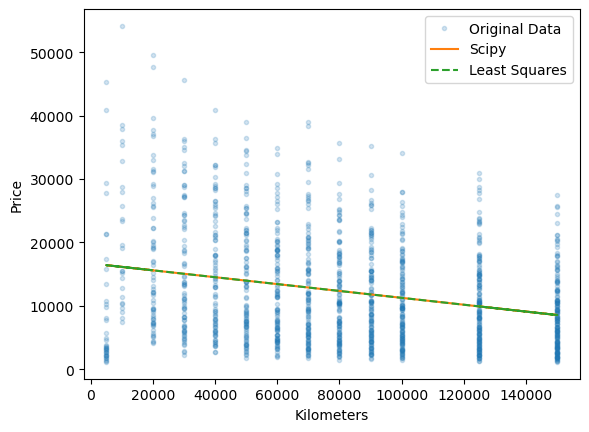

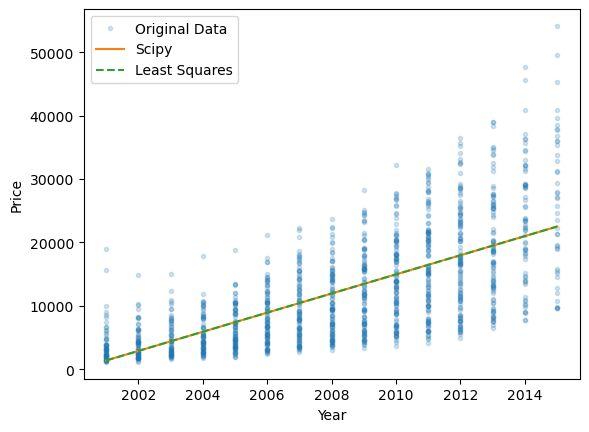

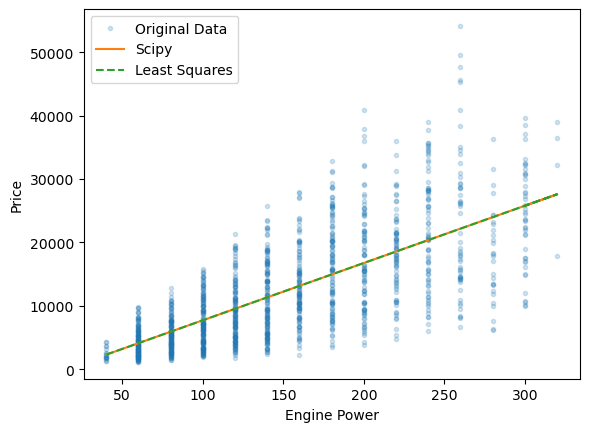

In [7]:
plt.plot(km,price,'.',label='Original Data',alpha=0.2)
plt.plot(km,price_km,label='Scipy')
plt.plot(km,manual_km,'--',label='Least Squares')
plt.xlabel('Kilometers')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.plot(year,price,'.',label='Original Data',alpha=0.2)
plt.plot(year,price_year,label='Scipy')
plt.plot(year,manual_y,'--',label='Least Squares')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.show()

plt.plot(power,price,'.',label='Original Data',alpha=0.2)
plt.plot(power,price_pw,label='Scipy')
plt.plot(power,manual_pw,'--',label='Least Squares')
plt.xlabel('Engine Power')
plt.ylabel('Price')
plt.legend()
plt.show()